<a href="https://colab.research.google.com/github/LuganThierry/newworkx_notebooks/blob/main/networkscience_aula8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install EoN --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import EoN

In [4]:
def download_file(url):
    file_path = url.split('/')[-1]
    resp = requests.get(url)
    with open(file_path, 'wb') as f:
        f.write(resp.content)
    return file_path

## Modelo de epidemia

In [5]:
N = 10000
p = 0.01
G = nx.erdos_renyi_graph(N, p, seed=42)
print(G)

Graph with 10000 nodes and 498300 edges


Parâmetros

In [6]:
tmax = 10
tau = 0.1  # transmission rate
gamma = 1.0  # recovery rate
rho = 0.005  # random fraction initially infected

Modelo com imunidade

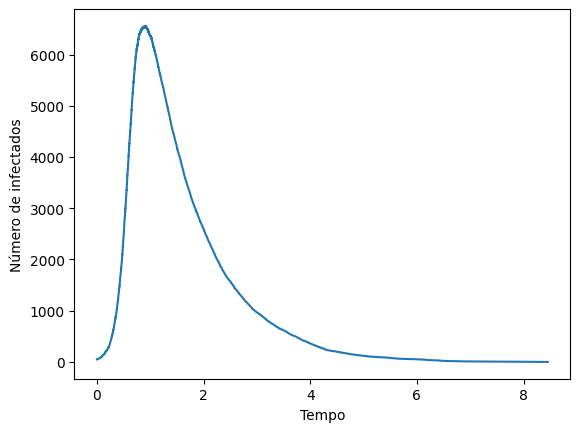

In [7]:
t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax=tmax)

plt.plot(t, I)
plt.xlabel('Tempo')
plt.ylabel('Número de infectados');

Modelo sem imunidade

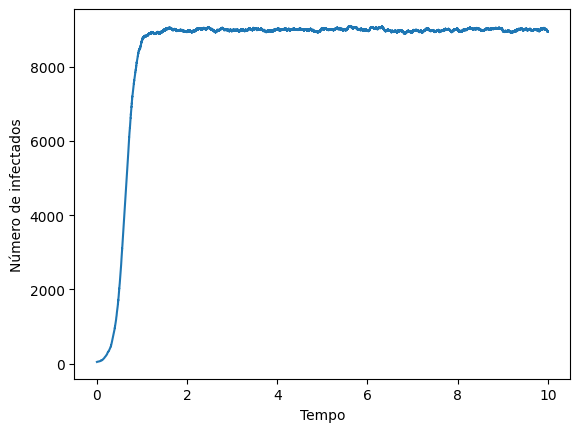

In [8]:
t, S, I = EoN.fast_SIS(G, tau, gamma, rho=rho, tmax=tmax)

plt.plot(t, I)
plt.xlabel('Tempo')
plt.ylabel('Número de infectados');

## Busca em redes

In [9]:
url = 'https://snap.stanford.edu/data/roadNet-PA.txt.gz'
file_path = download_file(url)
file_path

'roadNet-PA.txt.gz'

In [10]:
G = nx.read_edgelist(file_path, create_using=nx.DiGraph)
print(G)

DiGraph with 1088092 nodes and 3083796 edges


In [11]:
np.random.seed(42)
for src, dst in G.edges:
    G.edges[src, dst]['road_length'] = np.random.randint(1, 50)

Busca sem pesos

In [12]:
G.adj['0']

AtlasView({'1': {'road_length': 39}, '6309': {'road_length': 29}, '6353': {'road_length': 15}})

In [13]:
nx.shortest_path(G, '0', '1')

['0', '1']

In [14]:
nx.shortest_path(G, '0', '6309')

['0', '6309']

In [15]:
nx.shortest_path(G, '0', '6353')

['0', '6353']

In [16]:
nx.shortest_path_length(G, '0', '6353')

1

In [17]:
G.adj['6309']

AtlasView({'0': {'road_length': 8}, '6310': {'road_length': 21}, '6344': {'road_length': 39}})

In [18]:
nx.shortest_path(G, '0', '6310')

['0', '6309', '6310']

In [19]:
nx.shortest_path_length(G, '0', '6310')

2

In [ ]:
nx.shortest_path(G, '0', '2')

In [21]:
nx.shortest_path_length(G, '0', '2')


44

In [22]:
path = nx.shortest_path(G, '0', '2')
len(path) - 1

44

Busca com pesos

In [23]:
nx.shortest_path(G, '0', '1', weight='road_length')

['0', '1']

In [24]:
nx.shortest_path_length(G, '0', '1', weight='road_length')

39

In [25]:
path_to_2 = nx.shortest_path(G, '0', '2', weight='road_length')
len(path_to_2)

48

In [26]:
nx.shortest_path_length(G, '0', '2', weight='road_length')

892

## Falhas em redes

In [27]:
n = 5000
p = 0.005
G = nx.erdos_renyi_graph(n, p, seed=42)
print(G)

Graph with 5000 nodes and 62048 edges


In [28]:
nx.is_connected(G)

True

In [29]:
def attack(g, targeted, seed=None):
    np.random.seed(seed)  # Para fins didáticos, vamos fixar a semente
    num_removed = 0
    while nx.is_connected(g):
        if not targeted:  # Escolha totalmente aleatória
            node_to_remove = np.random.choice(g.nodes)
        else:  # Escolha proporcional ao grau
            degrees = [degree for node, degree in g.degree]
            degrees = np.array(degrees)
            prob = degrees / np.sum(degrees)  # Normalizando para somar 1
            node_to_remove = np.random.choice(g.nodes, p=prob)
        g.remove_node(node_to_remove)
        num_removed += 1
    print(f'Nós removidos até desconectar: {num_removed}')

In [30]:
H = G.copy()
attack(H, targeted=False, seed=42)

Nós removidos até desconectar: 3082


In [31]:
print(H)

Graph with 1918 nodes and 9202 edges


In [32]:
nx.is_connected(H)

False

In [33]:
H = G.copy()
attack(H, targeted=True, seed=42)

Nós removidos até desconectar: 2747


In [34]:
print(H)

Graph with 2253 nodes and 11368 edges


In [35]:
G = nx.barabasi_albert_graph(n, 2, seed=42)
print(G)

Graph with 5000 nodes and 9996 edges


In [36]:
nx.is_connected(G)

True

In [37]:
H = G.copy()
attack(H, targeted=False, seed=42)

Nós removidos até desconectar: 101


In [38]:
print(H)

Graph with 4899 nodes and 9585 edges


In [39]:
nx.is_connected(H)

False

In [40]:
H = G.copy()
attack(H, targeted=True, seed=42)

Nós removidos até desconectar: 33


In [41]:
print(H)

Graph with 4967 nodes and 9653 edges


In [42]:
H = G.copy()
attack(H, targeted=False, seed=1)

Nós removidos até desconectar: 58


In [43]:
H = G.copy()
attack(H, targeted=True, seed=1)

Nós removidos até desconectar: 7


## Recomendações em redes

In [44]:
url = 'https://snap.stanford.edu/data/ca-AstroPh.txt.gz'
file_path = download_file(url)
file_path

'ca-AstroPh.txt.gz'

In [45]:
G = nx.read_edgelist(file_path)
print(G)

Graph with 18772 nodes and 198110 edges


In [46]:
target_node = '276'
G.degree[target_node]

31

In [47]:
pairs = [(target_node, '283')]
recommendation = nx.common_neighbor_centrality(G, pairs, alpha=1.0)
recommendation = list(recommendation)
recommendation

[('276', '283', 1)]

In [48]:
list(nx.non_neighbors(G, target_node))[:10]

['1662',
 '5089',
 '6058',
 '6229',
 '10639',
 '16442',
 '19325',
 '19834',
 '21937',
 '25452']

In [49]:
available_recs = [(target_node, n) for n in nx.non_neighbors(G, target_node)]

In [50]:
recommendation = nx.common_neighbor_centrality(G, available_recs, alpha=1.0)
recommendation = pd.DataFrame(
    recommendation,
    columns=['source', 'destination', 'prediction']
)
recommendation.sort_values('prediction', ascending=False)

,source,destination,prediction
34,276,72391,4
39,276,78627,4
13,276,32432,3
37,276,77098,3
6256,276,15309,3
...,...,...,...
6549,276,93404,0
6550,276,95461,0
6551,276,96331,0
6552,276,96364,0


In [51]:
recommendation2 = nx.jaccard_coefficient(G, available_recs)
recommendation2 = pd.DataFrame(
    recommendation2,
    columns=['source', 'destination', 'prediction']
)
recommendation2.sort_values('prediction', ascending=False)

,source,destination,prediction
34,276,72391,0.117647
12704,276,3539,0.090909
8486,276,132043,0.073171
3303,276,124591,0.064516
1,276,5089,0.064516
...,...,...,...
6549,276,93404,0.000000
6550,276,95461,0.000000
6551,276,96331,0.000000
6552,276,96364,0.000000


In [52]:

recommendation3 = nx.adamic_adar_index(G, available_recs)
recommendation3 = pd.DataFrame(
    recommendation3,
    columns=['source', 'destination', 'prediction']
)
recommendation3.sort_values('prediction', ascending=False)

,source,destination,prediction
2140,276,120425,1.338287
34,276,72391,1.068811
39,276,78627,1.062724
12704,276,3539,0.993491
12694,276,10110,0.993491
...,...,...,...
6549,276,93404,0.000000
6550,276,95461,0.000000
6551,276,96331,0.000000
6552,276,96364,0.000000


In [53]:
recommendation4 = nx.preferential_attachment(G, available_recs)
recommendation4 = pd.DataFrame(
    recommendation4,
    columns=['source', 'destination', 'prediction']
)
recommendation4.sort_values('prediction', ascending=False)

,source,destination,prediction
315,276,53213,15624
288,276,35290,13237
293,276,38109,13020
2284,276,62821,12958
2115,276,93504,11997
...,...,...,...
17578,276,87910,31
17577,276,117290,31
17576,276,95148,31
5242,276,95880,31


In [54]:
G.degree['53213'], G.degree['35290']

(504, 427)